In [ ]:
from google.cloud import storage
from io import StringIO
import pandas as pd
#client = storage.Client()

client = storage.Client.from_service_account_json('healthy-display-272415-e6f36368f2ef.json')

bucket_name = 'python-files-datahack'
bucket = client.get_bucket(bucket_name)
folder='data/retail-data/by-day/'
files=bucket.list_blobs(prefix=folder)
#Listamos el nombre de todos los archivos

#Listamos el nombre de todos los archivos
fileList=[file.name for file in files if '.' in file.name]

In [43]:
#Se lee el archivo indicada para el ejercicio utilizando la libreria Pandas
total_lista=len(fileList)
data_global=pd.read_csv('gs://python-files-datahack/'+fileList[0])
for i in range(1,total_lista):
    archivo='gs://python-files-datahack/'+fileList[i]
    data_temp=pd.read_csv(archivo)
    data_global = pd.concat([data_global, data_temp], ignore_index=True)

In [45]:
data_global.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [46]:
#Generar un grafico que muestra los diez articulosmas vendidos en el mes
df_acumulado=data_global[data_global.InvoiceDate.between("2011-12-01 00:00:00", "2011-12-31 23:59:59", inclusive=True)]
total=df_acumulado.groupby(["Country"])["UnitPrice"].agg([sum])

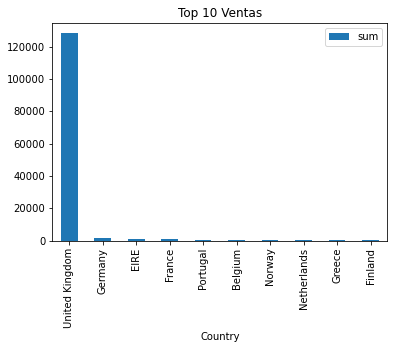

In [47]:
import matplotlib.pyplot as plt
total_ordenado=total.sort_values("sum", ascending=False)
top10=total_ordenado.head(10)
top10.plot(kind= "bar",title="Top 10 Ventas")
plt.show()

In [48]:
#Indicar dia señalando en una nueva columna si supera las 100 unidades vendidas como Trending caso contrario Not Trending
df_trending=df_acumulado.groupby(["InvoiceDate"])["Quantity"].agg([sum])
df_trending["Logró Trending?"] = df_trending["sum"].apply(lambda x: "Trending" if x >= 100 else "Not Trending")
df_trending

sum Logró Trending?
InvoiceDate                             
2011-12-01 08:12:00   -8    Not Trending
2011-12-01 08:14:00   -4    Not Trending
2011-12-01 08:18:00   -7    Not Trending
2011-12-01 08:23:00   -4    Not Trending
2011-12-01 08:25:00   -2    Not Trending
...                  ...             ...
2011-12-09 12:23:00   76    Not Trending
2011-12-09 12:25:00  120        Trending
2011-12-09 12:31:00  278        Trending
2011-12-09 12:49:00   66    Not Trending
2011-12-09 12:50:00  105        Trending

[899 rows x 2 columns]

In [50]:
# Base de datos de SQlite y crear una nueva tabla llamada 'producto' e insertar 3 valores.
!gsutil cp "gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db" .

Copying gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db...
/ [1 files][ 11.0 KiB/ 11.0 KiB]                                                
Operation completed over 1 objects/11.0 KiB.                                     


In [51]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///my-sqlite.db', echo=False)
connection = engine.connect()

In [52]:
from sqlalchemy import MetaData, Table
metadata = MetaData()

In [56]:
from sqlalchemy import (Table, Column, String, Integer, Boolean)
from sqlalchemy import MetaData
metadata = MetaData()
pacientes = Table('producto', metadata,
               Column('id', Integer()),
               Column('descripcion', String(255))
           )
metadata.create_all(engine)
engine.table_names()

['flight_info', 'producto']

In [59]:
productos = Table('producto', metadata, autoload=True,
autoload_with=engine)
print(repr(productos))

Table('producto', MetaData(bind=None), Column('id', Integer(), table=<producto>), Column('descripcion', String(length=255), table=<producto>), schema=None)


In [60]:
#Agregamos data de prueba
from sqlalchemy import insert
stmt = insert(productos)
valores = [
        {'id': 1, 'descripcion': 'manzana'},
        {'id': 2, 'descripcion': 'piña'},
        {'id': 3, 'descripcion': 'naranja'}
]
result_proxy = connection.execute(stmt, valores)
print(result_proxy.rowcount)

3
